In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading and Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machathon_preperation/quora/train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
[i for i in df['question1'].iloc[::10000]]

['What is the step by step guide to invest in share market in india?',
 'Is it safe for a woman to travel alone in Vietnam?',
 'What are the features of the Indian caste system?',
 "I am in my late 20's and I look older than I am. Need suggestions on best skincare products I can buy to begin with?",
 'How should I start learning Python?',
 'Why is human cloning considered unethical?',
 'How do iPads get viruses?',
 'What are some cake ideas for a teenager?',
 'How do I recover deleted files in an Android?',
 'What is the best Hollywood movie of 2016 and why?',
 'What should I ask my friend to get from UK to India?',
 'What are some ways to become an entrepreneur?',
 'I want to become a billionaire, how do I become one?',
 'Why has Hong Kong taken so long to return Singapore Terrex vehicle?',
 'Is it good to put CVT transmissions in an off-road car?',
 'How do I make my hair grow faster in 2 months?',
 'What possible career would you get from graduating AB/BA Philosophy?',
 'What is lab

In [ ]:
[i for i in df['question2'].iloc[::10000]]

['What is the step by step guide to invest in share market?',
 'Is it safe for a woman to travel alone in Japan?',
 'What triggers you the most when you play video games?',
 "Is domino's pizza halal?",
 'How should I start learning Python for Data Science?',
 'Why is cloning considered unethical?',
 'How do you get rid of a virus on an iPhone?',
 'What are some teenage cake ideas?',
 'How do I recover deleted files on an Android phone or tablet?',
 'Which are the best Hollywood movies of 2016?',
 'What is the process of getting a surgical residency in UK after completing MBBS from India?',
 'How do I become an entrepreneur?',
 'How can I become a billionaire?',
 'What is it like to grow up in Japan, SIngapore and Hong Kong?',
 'Which is a good car in the range of 2-3lacs on Delhi road?',
 'How do I grow my hair really fast and easiest way?',
 'What are the career options after graduating with a B.A. in philosophy?',
 'Is welfare a citizenship right?',
 'How do you find a Spiritual Guru

In [ ]:
df[df['qid1'] == 18840]

,id,qid1,qid2,question1,question2,is_duplicate
9701,9701,18840,18841,Do you believe there is life after death?,Do you believe in life after death?,1
15933,15933,18840,30400,Do you believe there is life after death?,Do you believe there is death after life?,0
72711,72711,18840,124883,Do you believe there is life after death?,How would life be after death?,1
90262,90262,18840,49658,Do you believe there is life after death?,What does life after death look like?,1
119781,119781,18840,88678,Do you believe there is life after death?,What are the theories as to what happens after...,1
190902,190902,18840,113929,Do you believe there is life after death?,"If there is life after death, why do I live?",1
232572,232572,18840,59735,Do you believe there is life after death?,Can we ever know if there is life after death?,1
262681,262681,18840,133237,Do you believe there is life after death?,Is there life after death?,1
269565,269565,18840,75205,Do you believe there is life after death?,Is there life after death? Can we revive our l...,1
364460,364460,18840,92133,Do you believe there is life after death?,What is the life after death.?,1


In [ ]:
df[df['qid1'] == 18841] #18841 is id that appeared before is qid2

,id,qid1,qid2,question1,question2,is_duplicate
32444,32444,18841,59735,Do you believe in life after death?,Can we ever know if there is life after death?,1
49853,49853,18841,88678,Do you believe in life after death?,What are the theories as to what happens after...,1
51991,51991,18841,92133,Do you believe in life after death?,What is the life after death.?,1
241249,241249,18841,75205,Do you believe in life after death?,Is there life after death? Can we revive our l...,1


Each question can appear as first or second in the pair multiple times

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[df['question1'].apply(lambda x: x.isalpha())]

,id,qid1,qid2,question1,question2,is_duplicate
17682,17682,33561,33562,deleted,Which website will be suitable for downloading...,0
23305,23305,33561,43661,deleted,Which are some best websites for downloading n...,0
23884,23884,44699,44700,HH,What is hh?,0
25315,25315,47198,29712,deleted,What kind of questions on Quora aren't OK? Wha...,0
39769,39769,33561,72063,deleted,What is a website where I can download eBooks ...,0
44619,44619,80055,80056,Na,How do I activate Reliance Jio 4G?,0
57484,57484,101005,101006,grammar,What is grammar?,0
108978,108978,178936,178937,i,What questions to ask any drdummer?,0
109311,109311,179423,179424,What,What are the options for getting fee concessio...,0
115347,115347,188110,52215,o,Where can I watch free streaming movies online?,0


In [ ]:
df[df['question2'].apply(lambda x: x.isalpha())]

,id,qid1,qid2,question1,question2,is_duplicate
74304,74304,127360,127361,Is there any chances for hailstones tomorrow?,parisflatlist,0
109009,109009,178981,178982,How do I make a box that I can put my phone in...,Hh,0
144506,144506,228687,228688,How beautiful do you think you are?,Delete,0
175282,175282,269923,44699,Hh,HH,1
181695,181695,278281,278282,Why does the page reload every time I try to c...,Why,0
198913,198913,300250,188110,What is this?,o,0
208199,208199,312128,312129,Happiness! We offer a seat or help others beca...,Edit,0
231313,231313,179756,341088,From where to download episode2 season 3 of Th...,deleted,0
236655,236655,153211,347631,Why was spam is called spam?,Spam,0
328745,328745,125092,455319,lol ?,lol,1


Some questions are dehk


1.   175282	175282	269923	44699	Hh	HH	1 **ظظظظ**
2.   328745	328745	125092	455319	lol ?	lol	1 **okay lol**  




# Preprocessing

In [ ]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers.core import Lambda
from keras.layers import Input, Concatenate, Flatten, Dense, Embedding, LSTM ,  Multiply, Dropout, Subtract, Add
import torch
!pip install -U torchtext==0.8.0
from torchtext.data import Field
from torchtext.vocab import GloVe

Requirement already up-to-date: torchtext==0.8.0 in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import ast

In [ ]:
def remove_punc_word(word):
  # initializing punctuations string  
  punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
  # Removing punctuations in string 
  # Using loop + punctuation string 
  for ele in word:  
    if ele in punc:  
        word = word.replace(ele, " ")  
  return word

def remove_punc_list(word_list):
  for i in range(len(word_list)):
    word_list[i] = remove_punc_word(word_list[i])
  return word_list

def clear_string(text):
  # Clean the text
  text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
  #text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", "is", text)
  text = re.sub(r"\'ve", "have", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"n't", "not", text)
  text = re.sub(r"\'m", "am", text)
  text = re.sub(r"\'re", "are", text)
  text = re.sub(r"\'d", "would", text)
  text = re.sub(r"\'ll", "will", text)
  #text = re.sub(r",", " ", text)
  #text = re.sub(r"\.", " ", text)
  #text = re.sub(r"!", " ! ", text)
  #text = re.sub(r"\/", " ", text)
  #text = re.sub(r"\^", " ^ ", text)
  #text = re.sub(r"\+", " + ", text)
  #text = re.sub(r"\-", " - ", text)
  #text = re.sub(r"\=", " = ", text)
  #text = re.sub(r"'", " ", text)
  text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
  #text = re.sub(r":", " : ", text)
  text = re.sub(r" e g ", " eg ", text)
  text = re.sub(r" b g ", " bg ", text)
  text = re.sub(r" u s ", " american ", text)
  text = re.sub(r"\0s", "0", text)
  text = re.sub(r" 9 11 ", "911", text)
  text = re.sub(r"e - mail", "email", text)
  text = re.sub(r"j k", "jk", text)
  text = re.sub(r"\s{2,}", " ", text)
  return text


In [ ]:
def preprocess_line(line,tokenize=True,punc_remove=True,stem=True,tokenizer=word_tokenize,stops_remove=True,punc_remover= lambda x: [word for word in x if word.isalpha()],stemmer = SnowballStemmer('english'),stop_words=stopwords.words('english')):
  processed_text = line 
  # (1) Tokenizing
  if tokenize:
    processed_text = tokenizer(line)
  # (1.1) Cleaning String
  processed_text =  [clear_string(word) for word in processed_text]
  # (2) Stemming
  if stem:
    processed_text = [stemmer.stem(word) for word in processed_text]
  # (3) Stop words
  if stops_remove:
    processed_text = [word for word in processed_text if word not in stop_words]
  # (4) Removing Punc (Default: Remove everything except pure text)
  if punc_remove:
    processed_text = punc_remover(processed_text)
  # (5) Spaces Removal
  processed_text = list(filter(lambda x: x and x.strip(),processed_text))
  return processed_text

In [ ]:
df['question1'] = df['question1'].apply(lambda x: preprocess_line(x,punc_remover=remove_punc_list)) 
df['question2'] = df['question2'].apply(lambda x: preprocess_line(x,punc_remover=remove_punc_list)) 
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",0
1,1,3,4,"[stori, kohinoor, koh i noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",0
2,2,5,6,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",0
3,3,7,8,"[whi, mental, veri, lone, solv]","[find, remaind, math, 23 , 24, math, divid, 2...",0
4,4,9,10,"[one, dissolv, water, quik, sugar, salt, metha...","[fish, would, surviv, salt, water]",0
...,...,...,...,...,...,...
404285,404285,433578,379845,"[mani, keyword, racket, program, languag, late...","[mani, keyword, perl, program, languag, latest...",0
404286,404286,18840,155606,"[believ, life, death]","[true, life, death]",1
404287,404287,537928,537929,"[one, coin]",[coin],0
404288,404288,537930,537931,"[approx, annual, cost, live, studi, uic, chica...","[littl, hairfal, problem, want, use, hair, sty...",0


In [ ]:
df['question1_len'] = df['question1'].apply(lambda x: len(x))
df['question2_len'] = df['question2'].apply(lambda x: len(x))
df

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len
0,0,0,1,2,"[595, 595, 1825, 184, 433, 113, 6]","[595, 595, 1825, 184, 433, 113]",0,7,6
1,1,1,3,4,"[294, 10588, 17081, 2898]","[12, 45, 30, 163, 8257, 10588, 17081, 2898, 149]",0,4,9
2,2,2,5,6,"[138, 381, 310, 472, 8, 2383]","[310, 381, 138, 181, 7923]",0,6,5
3,3,3,7,8,"[2, 1002, 256, 2211, 448]","[39, 3249, 241, 27193, 1455, 608, 1598, 48190]",0,5,8
4,4,4,9,10,"[15, 4418, 177, 25957, 1722, 1713, 7719, 1433,...","[1482, 12, 901, 1713, 177]",0,10,5
...,...,...,...,...,...,...,...,...,...
404282,404285,404285,433578,379845,"[37, 1929, 7305, 69, 78, 1044, 854]","[37, 1929, 8673, 69, 78, 1044, 854]",0,7,7
404283,404286,404286,18840,155606,"[254, 20, 458]","[214, 20, 458]",1,3,3
404284,404287,404287,537928,537929,"[15, 1647]",[1647],0,2,1
404285,404288,404288,537930,537931,"[5390, 2402, 223, 77, 83, 23109, 2732, 30, 79]","[994, 6158, 213, 40, 8, 220, 1496, 166, 15, 62...",0,9,13


In [ ]:
#df.to_csv('/content/drive/MyDrive/machathon_preperation/quora/check_point_words.csv')
df = pd.read_csv('/content/drive/MyDrive/machathon_preperation/quora/check_point_words.csv') #Load checkpoint
df['question1'] = df['question1'].apply(lambda x:ast.literal_eval(x))
df['question2'] = df['question2'].apply(lambda x:ast.literal_eval(x))

In [ ]:
text_field = Field()
embedder = GloVe(name='6B', dim=300)
text_field.build_vocab(
    pd.concat([df['question1'],df['question2']],ignore_index=True), 
    vectors=embedder
)



/usr/local/lib/python3.7/dist-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [ ]:
vocab = text_field.vocab
len(vocab)

88824

In [ ]:
df['question1_len'].max()

54

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


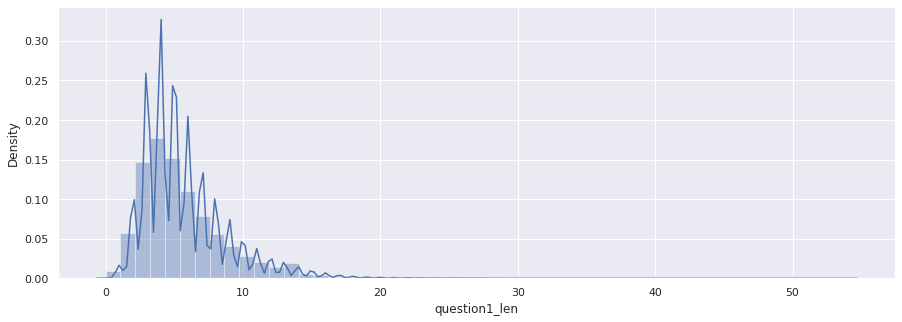

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['question1_len'])

In [ ]:
df['question2_len'].max()

104

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


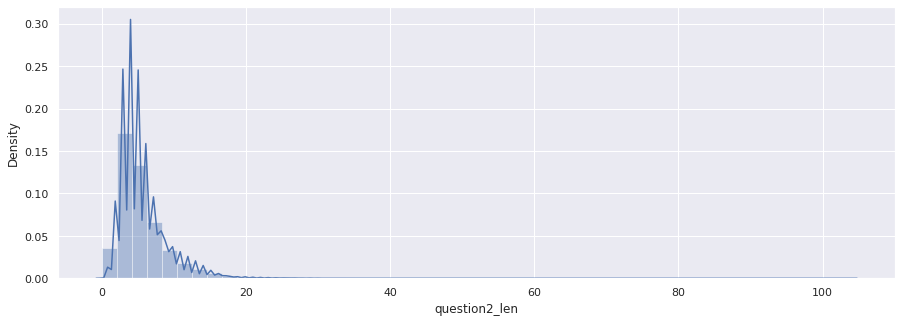

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['question2_len'])

In [ ]:
df['question1'] = df['question1'].apply(lambda x: [vocab[word] for word in x])
df['question2'] = df['question2'].apply(lambda x: [vocab[word] for word in x])
df

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,question1_len,question2_len
0,0,0,1,2,"[595, 595, 1825, 184, 433, 113, 6]","[595, 595, 1825, 184, 433, 113]",0,7,6
1,1,1,3,4,"[294, 10588, 17081, 2898]","[12, 45, 30, 163, 8257, 10588, 17081, 2898, 149]",0,4,9
2,2,2,5,6,"[138, 381, 310, 472, 8, 2383]","[310, 381, 138, 181, 7923]",0,6,5
3,3,3,7,8,"[2, 1002, 256, 2211, 448]","[39, 3249, 241, 27193, 1455, 608, 1598, 48190]",0,5,8
4,4,4,9,10,"[15, 4418, 177, 25957, 1722, 1713, 7719, 1433,...","[1482, 12, 901, 1713, 177]",0,10,5
...,...,...,...,...,...,...,...,...,...
404282,404285,404285,433578,379845,"[37, 1929, 7305, 69, 78, 1044, 854]","[37, 1929, 8673, 69, 78, 1044, 854]",0,7,7
404283,404286,404286,18840,155606,"[254, 20, 458]","[214, 20, 458]",1,3,3
404284,404287,404287,537928,537929,"[15, 1647]",[1647],0,2,1
404285,404288,404288,537930,537931,"[5390, 2402, 223, 77, 83, 23109, 2732, 30, 79]","[994, 6158, 213, 40, 8, 220, 1496, 166, 15, 62...",0,9,13


In [ ]:
#df.to_csv('/content/drive/MyDrive/machathon_preperation/quora/check_point.csv')
df = pd.read_csv('/content/drive/MyDrive/machathon_preperation/quora/check_point.csv') #Load checkpoint
df['question1'] = df['question1'].apply(lambda x:ast.literal_eval(x))
df['question2'] = df['question2'].apply(lambda x:ast.literal_eval(x))

In [ ]:
MAX_LENGTH = 30
EMBEDDING_DIM = 300

In [ ]:
q1_seq = pad_sequences(df['question1'], maxlen=MAX_LENGTH, padding='post')
q2_seq = pad_sequences(df['question2'], maxlen=MAX_LENGTH, padding='post')
q1_seq

array([[  595,   595,  1825, ...,     0,     0,     0],
       [  294, 10588, 17081, ...,     0,     0,     0],
       [  138,   381,   310, ...,     0,     0,     0],
       ...,
       [   15,  1647,     0, ...,     0,     0,     0],
       [ 5390,  2402,   223, ...,     0,     0,     0],
       [    7,   108,  3221, ...,     0,     0,     0]], dtype=int32)

In [ ]:
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [ ]:
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
input_1 = Input(shape=(q1_seq.shape[1],))
input_2 = Input(shape=(q2_seq.shape[1],))


common_embed = Embedding(name="synopsis_embedd",input_dim =len(vocab), 
                       output_dim=EMBEDDING_DIM,weights=[vocab.vectors], 
                       input_length=q1_seq.shape[1],trainable=False) 
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)


common_lstm = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(lstm_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])

x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])
x4 = Subtract()([x1_, x2_])
    
    #https://stackoverflow.com/a/51003359/10650182
x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])
    
conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation="sigmoid", name = 'out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="binary_crossentropy", metrics=['acc',auroc], optimizer=Adam(0.00001))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
synopsis_embedd (Embedding)     (None, 30, 300)      26647200    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 30, 64)       93440       synopsis_embedd[0][0]        

In [ ]:
number_of_pairs = len(q1_seq)

q1_seq_val = q1_seq[int(0.8*number_of_pairs):number_of_pairs]
q2_seq_val = q2_seq[int(0.8*number_of_pairs):number_of_pairs]
y_val= df['is_duplicate'].iloc[int(0.8*number_of_pairs):number_of_pairs]

q1_seq = q1_seq[:int(0.8*number_of_pairs)]
q2_seq = q2_seq[:int(0.8*number_of_pairs)]
y_train = df['is_duplicate'].iloc[:int(0.8*number_of_pairs)]

In [ ]:
model.fit([q1_seq,q2_seq],y_train.values.reshape(-1,1), epochs = 5,batch_size=64, validation_data=( [q1_seq_val,q2_seq_val],y_val.values.reshape(-1,1) ) )